# Association Rules - Mental Health Survey
A project by Dustin Pacholleck

#### Mental Health is Important.
Nowadays, mental health recieves more and more awarness. Despite Covid-19, mental health is viewed of over 30% of people as the leading health problem [1].
Worldwide over 10% of the population is suffering from one of many mental health conditions [2].
Therefore, it is from high importance to find out what is associated with mental health at the workplace. For employers the health of their employees translates directly into productivity and higher earnings. As a consequence employers should be interested in what to avoid and what to emphasize on. 

#### The Goal

The goal is to understand what the profiles are of people who sought treatment for a mental health condition. Furthermore, we will investigate what is associated with high and low work interferences due to mental health conditions. From this we try to conclude how the work environment can help people with mental health conditions.

#### The Methodology
We are mining the associations to different mental health indicator with the help of association rules. Wikipedia defines this technique as follows: "Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness. In any given transaction with a variety of items, association rules are meant to discover the rules that determine how or why certain items are connected. [...] Every rule is composed by two different sets of items, also known as itemsets, X and Y, where X is called antecedent or left-hand-side (LHS) and Y consequent or right-hand-side (RHS). The antecedent is that item that can be found in the data while the consequent is the item found when combined with the antecedent. The statement X -> Y is often read as if X then Y, where the antecedent (X) is the if and the consequent (Y) is the then. This simply implies that, in theory, whenever X occurs in a dataset, then Y will as well" [3].

#### The Data
In this research we are looking at the 2014 mental health survey mostly in tech collected by Open Sourcing Mental Illness Ltd and made availabe on https://osmihelp.org/research.
The survey consists of 1259 observations and 27 variables. For the first understanding it is important to know the meaning of the variables:

| Variable                | Description                                                                                                          |
|-------------------------|----------------------------------------------------------------------------------------------------------------------|
| Timestamp               |                                                                                                                      |
| Age                     |                                                                                                                      |
| Gender                  |                                                                                                                      |
| Country                 |                                                                                                                      |
| state                   | If you live in the United States, which state or territory do you live in?                                           |
| self_employed           | Are you self-employed?                                                                                               |
| family_history          | Do you have a family history of mental illness?                                                                      |
| treatment               | Have you sought treatment for a mental health condition?                                                             |
| work_interfere          | If you have a mental health condition, do you feel that it interferes with your work?                                |
| no_employees            | How many employees does your company or organization have?                                                           |
| remote_work             | Do you work remotely (outside of an office) at least 50% of the time?                                                |
| tech_company            | Is your employer primarily a tech company/organization?                                                              |
| benefits                | Does your employer provide mental health benefits?                                                                   |
| care_options            | Do you know the options for mental health care your employer provides?                                               |
| wellness_program        | Has your employer ever discussed mental health as part of an employee wellness program?                              |
| seek_help               | Does your employer provide resources to learn more about mental health issues and how to seek help?                  |
| anonymity               | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? |
| leave                   | How easy is it for you to take medical leave for a mental health condition?                                          |
| mentalhealthconsequence | Do you think that discussing a mental health issue with your employer would have negative consequences?              |
| physhealthconsequence   | Do you think that discussing a physical health issue with your employer would have negative consequences?            |
| coworkers               | Would you be willing to discuss a mental health issue with your coworkers?                                           |
| supervisor              | Would you be willing to discuss a mental health issue with your direct supervisor(s)?                                |
| mentalhealthinterview   | Would you bring up a mental health issue with a potential employer in an interview?                                  |
| physhealthinterview     | Would you bring up a physical health issue with a potential employer in an interview?                                |
| mentalvsphysical        | Do you feel that your employer takes mental health as seriously as physical health?                                  |
| obs_consequence         | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?   |
| comments                | Any additional notes or comments                                                                                     |

</br>

## Data Preparation

In [3]:
# Load dataframe
df <- read.csv("C:/Users/duzzi/Documents/University_Projects/Unsupervised-Learning/data/survey.csv")

In [4]:
names(df)

[1] "Timestamp"                 "Age"                      
 [3] "Gender"                    "Country"                  
 [5] "state"                     "self_employed"            
 [7] "family_history"            "treatment"                
 [9] "work_interfere"            "no_employees"             
[11] "remote_work"               "tech_company"             
[13] "benefits"                  "care_options"             
[15] "wellness_program"          "seek_help"                
[17] "anonymity"                 "leave"                    
[19] "mental_health_consequence" "phys_health_consequence"  
[21] "coworkers"                 "supervisor"               
[23] "mental_health_interview"   "phys_health_interview"    
[25] "mental_vs_physical"        "obs_consequence"          
[27] "comments"

We can see that all 27 variables were successfully loaded.

### Inspect and Preprocess the Dataframe

Here, we check the dataframe and find the necessary preprocessing steps.

In [5]:
head(df)

Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2014-08-27 11:29:31,37,Female,United States,IL,NA,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA
2014-08-27 11:29:37,44,M,United States,IN,NA,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA
2014-08-27 11:29:44,32,Male,Canada,NA,NA,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA
2014-08-27 11:29:46,31,Male,United Kingdom,NA,NA,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA
2014-08-27 11:30:22,31,Male,United States,TX,NA,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA
2014-08-27 11:31:22,33,Male,United States,TN,NA,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NA


In [6]:
str(df)

'data.frame':	1259 obs. of  27 variables:
 $ Timestamp                : Factor w/ 1246 levels "2014-08-27 11:29:31",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Age                      : num  37 44 32 31 31 33 35 39 42 23 ...
 $ Gender                   : Factor w/ 49 levels "A little about you",..: 16 24 30 30 30 30 16 24 16 30 ...
 $ Country                  : Factor w/ 48 levels "Australia","Austria",..: 46 46 8 45 46 46 46 8 46 8 ...
 $ state                    : Factor w/ 45 levels "AL","AZ","CA",..: 11 12 NA NA 38 37 19 NA 11 NA ...
 $ self_employed            : Factor w/ 2 levels "No","Yes": NA NA NA NA NA NA NA NA NA NA ...
 $ family_history           : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 2 1 2 1 ...
 $ treatment                : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 1 2 1 2 1 ...
 $ work_interfere           : Factor w/ 4 levels "Never","Often",..: 2 3 3 2 1 4 4 1 4 1 ...
 $ no_employees             : Factor w/ 6 levels "1-5","100-500",..: 5 6 5 3 2 5 1 1 2 3 ...
 $ remote_work  

First we can notice that the timestamp got imported as a Factor. For our convenience we convert it as date. 

In [7]:
df$Timestamp <- as.Date(df$Timestamp)

In [8]:
table(df$Timestamp)


2014-08-27 2014-08-28 2014-08-29 2014-08-30 2014-08-31 2014-09-01 2014-09-02 
       614        331        160         23          7         15          9 
2014-09-03 2014-09-04 2014-09-05 2014-09-08 2014-09-09 2014-09-11 2014-09-12 
         2          4          2          3          1          1          1 
2014-09-13 2014-09-14 2014-09-20 2014-09-23 2014-09-26 2014-09-30 2014-10-02 
         1          2          1          1          3          1          1 
2014-10-05 2014-10-09 2014-11-05 2014-11-06 2014-11-16 2014-12-01 2014-12-15 
         1          1          1          1          1          1          1 
2015-01-03 2015-02-21 2015-02-22 2015-02-24 2015-02-26 2015-04-02 2015-04-04 
         1         38          1          7          1          1          1 
2015-04-06 2015-04-11 2015-04-23 2015-05-05 2015-05-06 2015-05-07 2015-06-25 
         1          1          1          2          2          1          1 
2015-07-22 2015-07-27 2015-08-17 2015-08-20 2015-08-25 2015-09-

Most of the data was collected in August 2014. Only a few survey results come from later points in time. Therefore, we will focus in the answers within one month.

In [9]:
df <- df[df$Timestamp < "2014-09-28",]

In [ ]:
install.packages("psych")


  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.1.9             FALSE



installing the source package 'psych'



In [ ]:
library(psych)

In [10]:
summary(df)

   Timestamp               Age                 Gender              Country   
 Min.   :2014-08-27   Min.   :-1.726e+03   Male   :581   United States :721  
 1st Qu.:2014-08-27   1st Qu.: 2.700e+01   male   :185   United Kingdom:172  
 Median :2014-08-27   Median : 3.100e+01   M      :114   Canada        : 70  
 Mean   :2014-08-28   Mean   : 8.467e+07   Female :113   Germany       : 43  
 3rd Qu.:2014-08-28   3rd Qu.: 3.600e+01   female : 56   Netherlands   : 22  
 Max.   :2014-09-26   Max.   : 1.000e+11   F      : 37   Australia     : 19  
                                           (Other): 95   (Other)       :134  
     state     self_employed family_history treatment   work_interfere
 CA     :132   No  :1023     No :721        No :593   Never    :203   
 WA     : 69   Yes : 140     Yes:460        Yes:588   Often    :127   
 NY     : 57   NA's:  18                              Rarely   :163   
 TN     : 44                                          Sometimes:437   
 TX     : 40         

We can see that we have a lot of different entries for gender which needs cleaning. Also we have to group age into intervals. For further analysis we can omit the timestamp and the individual comment. 

In [11]:
df <- subset(df, select = -c(Timestamp, comments))

In [12]:
df <- df[df$Age >= 18 & df$Age <65,] 

In [13]:
df$age_grp <- df$Age
df$age_grp <- ifelse((df$Age>=10 & df$Age<=18) , 'minnor',df$age_grp)
df$age_grp <- ifelse((df$Age>18 & df$Age<=21) , '<=21',df$age_grp)
df$age_grp <- ifelse((df$Age>21 & df$Age<=25) , '22-25',df$age_grp)
df$age_grp <- ifelse((df$Age>25 & df$Age<=30) , '26-30',df$age_grp)
df$age_grp <- ifelse((df$Age>30 & df$Age<=35) , '31-35',df$age_grp)
df$age_grp <- ifelse((df$Age>35 & df$Age<=40) , '36-40',df$age_grp)
df$age_grp <- ifelse((df$Age>40 & df$Age<=55) , '41-55',df$age_grp)
df$age_grp <- ifelse((df$Age>55 & df$Age<=60) , '56-60',df$age_grp)
df$age_grp <- ifelse((df$Age>60 & df$Age<=65) , '61-65',df$age_grp)
df$age_grp <- ifelse((df$Age>65) , '>65',df$age_grp)
df$age_grp<-as.factor(df$age_grp)

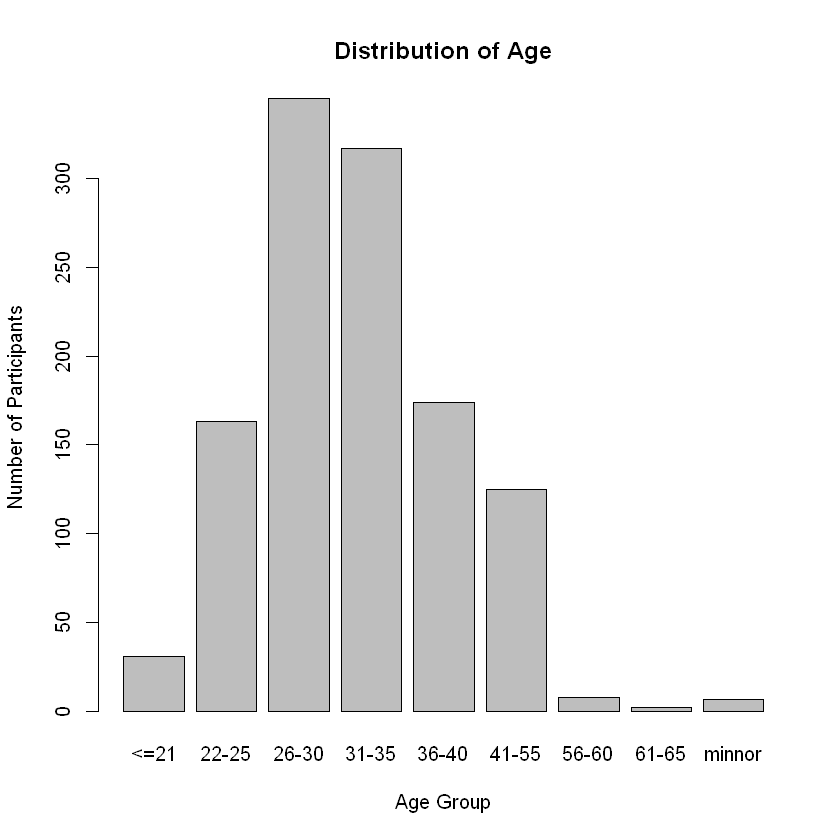

In [14]:
plot(df$age_grp, main='Distribution of Age', ylab='Number of Participants', xlab="Age Group")

Viewing the age distibution, we can see that most participants are in the age group 26-35. Therefore, we are mostly analyzing young adults.

Gender was entered in different ways as you can see below. As a consequence, we have to recode it.

In [15]:
unique(df$Gender)

[1] Female                   M                        Male                    
 [4] male                     female                   m                       
 [7] Male-ish                 maile                    Trans-female            
[10] Cis Female               F                        something kinda male?   
[13] Cis Male                 Woman                    f                       
[16] Mal                      Male (CIS)               queer/she/they          
[19] non-binary               Femake                   woman                   
[22] Make                     Nah                      Enby                    
[25] fluid                    Genderqueer              Female                  
[28] Androgyne                Agender                  cis-female/femme        
[31] Guy (-ish) ^_^           male leaning androgynous Male                    
[34] Man                      Trans woman              msle                    
[37] Neuter                   Female (trans)           queer                   
[40] Female (cis)             Mail                     cis male                
[43] Malr                    
49 Levels: A little about you Agender All Androgyne ... Woman

In [16]:
df$Gender <-as.character(df$Gender)

In [17]:
df$Gender <- ifelse(df$Gender=="Male"|df$Gender=="M"|df$Gender=="male"|df$Gender=="m"|df$Gender=="Male-ish"|df$Gender=="maile"|df$Gender=="Cis Male"|df$Gender=="Mal"
                    |df$Gender=="Male (CIS)"|df$Gender=="Make"|df$Gender=="Guy (-ish) ^_^"|df$Gender=="male leaning androgynous"|df$Gender=="Male "|df$Gender=="Man"|df$Gender=="msle"
                    |df$Gender=="Mail"|df$Gender=="cis male"|df$Gender=="Malr","Male",ifelse(df$Gender=="Female"|df$Gender=="female"|df$Gender=="Trans-female"|df$Gender=="Cis Female"|df$Gender=="F"|df$Gender=="f"|df$Gender=="Woman"|df$Gender=="Femake"
                    |df$Gender=="woman"|df$Gender=="Female "|df$Gender=="cis-female/femme"|df$Gender=="Trans woman"|df$Gender=="Female (trans)"|df$Gender=="Female (cis)"|df$Gender=="msle"
                    |df$Gender=="Mail"|df$Gender=="cis male"|df$Gender=="Malr","Female","Other"))

In [18]:
unique(df$Gender)

[1] "Female" "Male"   "Other"

In [19]:
df$Gender <- as.factor(df$Gender)

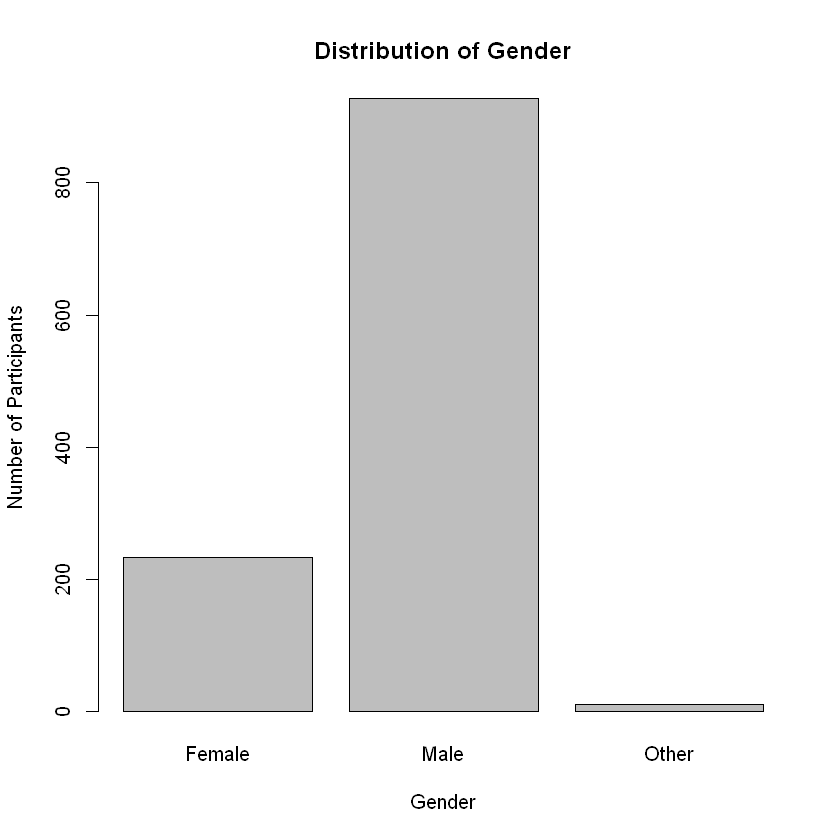

In [21]:
plot(df$Gender, main='Distribution of Gender', ylab='Number of Participants', xlab="Gender")

Most of our participants are males. This also reflects the landscape of tech companies back in 2014.

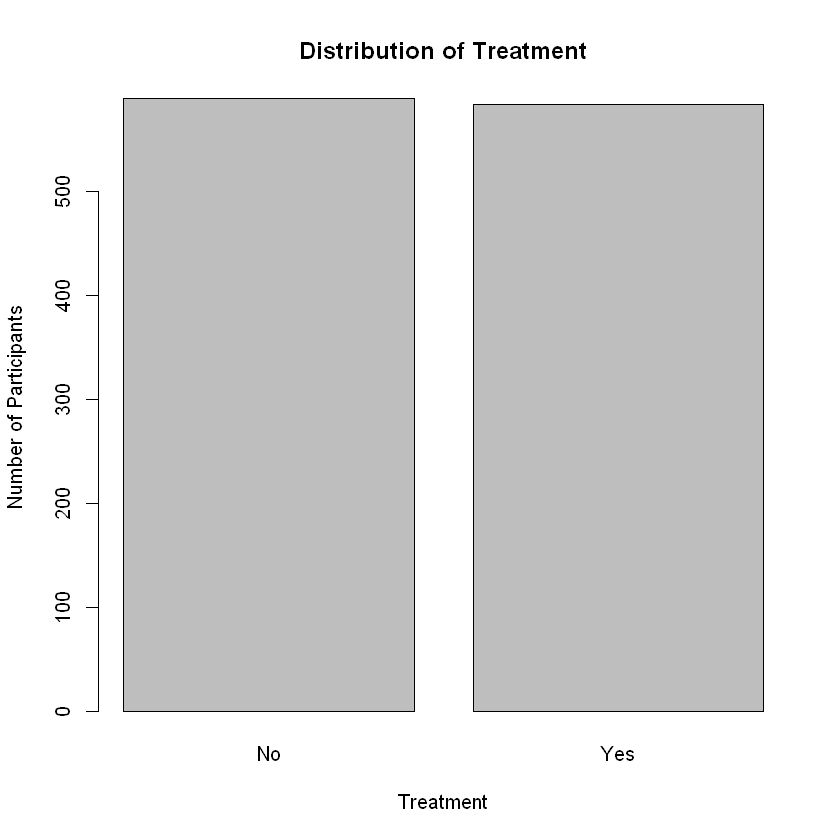

In [23]:
plot(df$treatment, main='Distribution of Treatment', ylab='Number of Participants', xlab="Treatment")

The dataset is very balanced in our variable of interest. We can see similar amounts of persons who sought treatment and who have not.

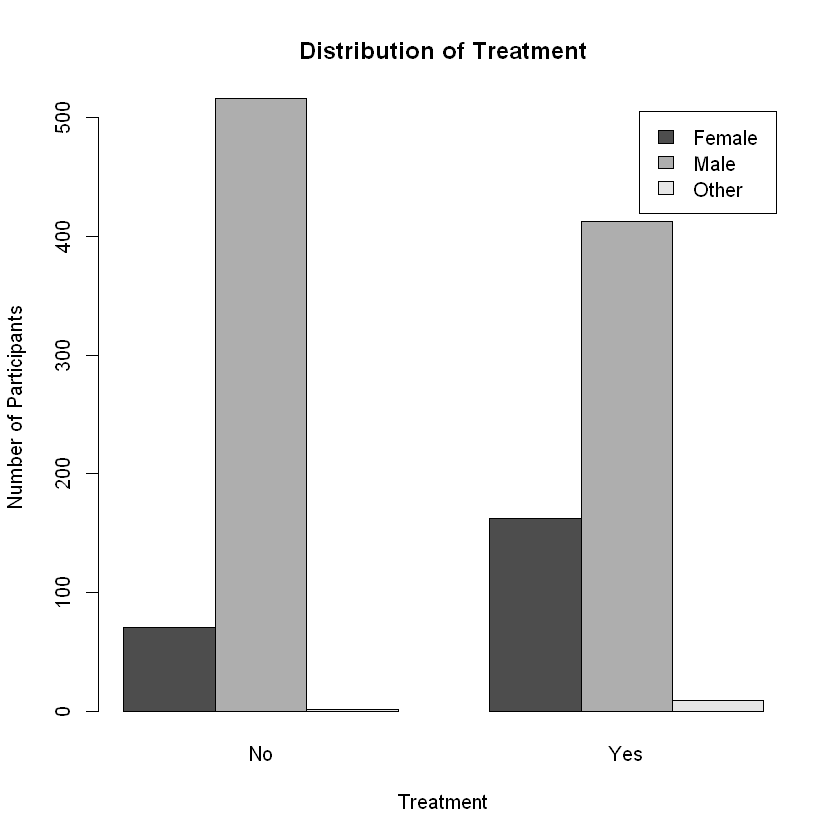

In [25]:
Table<-with(df,table(df$Gender,df$treatment))
barplot(Table,beside=TRUE,legend=TRUE, main='Distribution of Treatment', ylab='Number of Participants', xlab="Treatment")

Investigating the treatment by sex we can see that more females sought treatment then not. For males the opposite holds true.

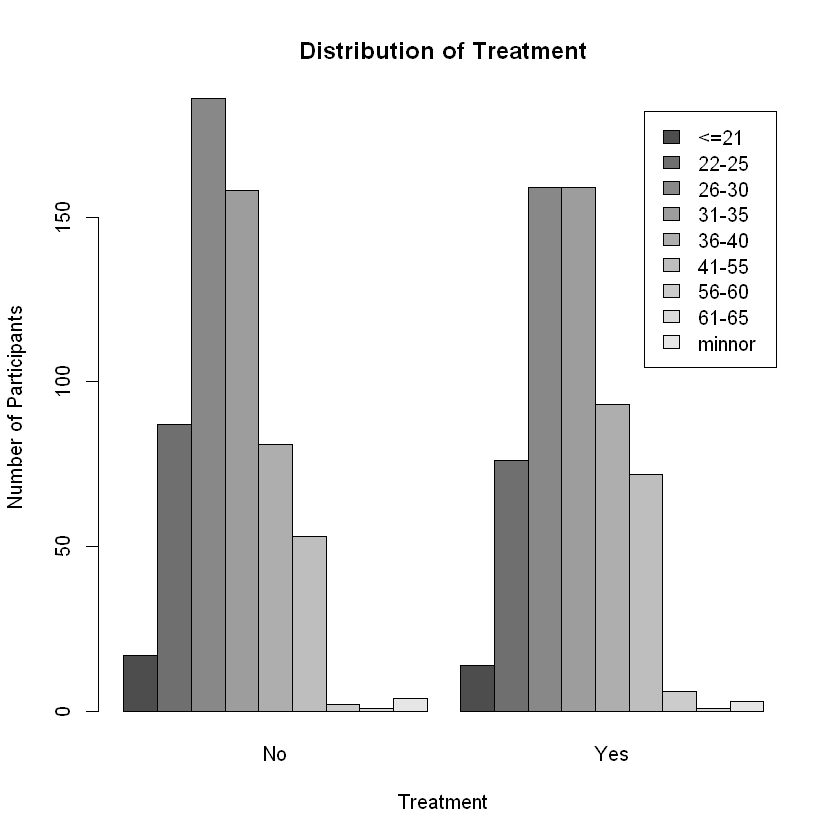

In [26]:
Table<-with(df,table(df$age_grp,df$treatment))
barplot(Table,beside=TRUE,legend=TRUE, main='Distribution of Treatment', ylab='Number of Participants', xlab="Treatment")

The distibutions by age do not indicate a big difference since they are similarly spread amoung age groups.

In [27]:
# Add column names to make identification easier
for(i in 1:ncol(df)){
    name <- names(df[i][1])
    df[ , i] <- paste(name,df[ , i])
} 

In [28]:
# Save preprocessed file
write.csv(df, file="C:/Users/duzzi/Documents/University_Projects/Unsupervised-Learning/data/survey_cleaned.csv")

## Association Rule Mining

To find the rules what is associated with people who sought treatment for a mental health condition, we apply association rule mining.

Eventhough it is quite tough to evalutate the performance of a rule learner we can take **Support, Confidence and Lift** as indications.

- Support measures how often an itemset appears in the dataset. </br> 
- Confidence is the proportion of transactions where the presence of an item(set) X results in Y.</br>
- Lift is a measure of conditional probability of Y given X.</br>

For the mining we will make use of the Apriori alogrithm. It "proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often. The name of the algorithm is Apriori because it uses prior knowledge of frequent itemset properties" [3]. </br>
The algorithm uses statistical measures of an itemsets interestingness which allows for usages on larger datasets. It identifies all itemsets that meet a defined minimum support level and creates rules for these meeting a minimim confidence level. 

For the datasize we have, we want to meet a support of 5% which translates to minimum 60 observations. </br>
For the condidence we specify a level of 8%. Nevertheless, we will sort our mined rules by confidence to get the most meaningful rules.

In [ ]:
install.packages("arules")
library(arules)
trans1<-read.transactions("C:/Users/duzzi/Documents/University_Projects/Unsupervised-Learning/data/survey_cleaned.csv", format="basket", sep=",", skip=0, header=TRUE) # reading the file as transactions
trans1
inspect(trans1)
size(trans1)
length(trans1)

In [ ]:
#[...] 
#[1171] {1180,                            
#         Age 25,                          
#         age_grp 22-25,                   
#         anonymity Don't know,            
#         benefits No,                     
#         care_options No,                 
#         Country Bulgaria,                
#         coworkers Yes,                   
#         family_history No,               
#         Gender Female,                   
#         leave Don't know,                
#         mental_health_consequence Maybe, 
#         mental_health_interview Maybe,   
#         mental_vs_physical No,           
#         no_employees 26-100,             
#         obs_consequence No,              
#         phys_health_consequence Maybe,   
#         phys_health_interview No,        
#         remote_work Yes,                 
#         seek_help No,                    
#         self_employed No,                
#         state UT,                        
#         supervisor Some of them,         
#         tech_company Yes,                
#         treatment Yes,                   
#         wellness_program No,             
#         work_interfere Sometimes}        
# [1172] {1181,                            
#         Age 32,                          
#         age_grp 31-35,                   
#         anonymity Yes,                   
#         benefits Yes,                    
#         care_options Yes,                
#         Country United States,           
#         coworkers Some of them,          
#         family_history No,               
#         Gender Female,                   
#         leave Don't know,                
#         mental_health_consequence Maybe, 
#         mental_health_interview No,      
#         mental_vs_physical No,           
#         no_employees 26-100,             
#         obs_consequence No,              
#         phys_health_consequence Maybe,   
#         phys_health_interview No,        
#         remote_work No,                  
#         seek_help No,                    
#         self_employed No,                
#         state NY,                        
#         supervisor No,                   
#         tech_company Yes,                
#         treatment Yes,                   
#         wellness_program No,             
#         work_interfere Sometimes}        
# > size(trans1)
#    [1] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#   [62] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [123] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [184] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [245] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [306] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [367] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [428] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [489] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [550] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [611] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [672] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [733] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [794] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [855] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [916] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [977] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
#  [ reached getOption("max.print") -- omitted 172 entries ]
# > length(trans1)
# [1] 1172

In [ ]:
library(arulesViz)
install.packages("RColorBrewer")
library(RColorBrewer)

# using itemFrequencyPlot() function
arules::itemFrequencyPlot(trans1, topN = 20,
                          col = brewer.pal(8, 'Pastel2'),
                          main = 'Relative Item Frequency Plot',
                          type = "relative",
                          ylab = "Item Frequency (Relative)")

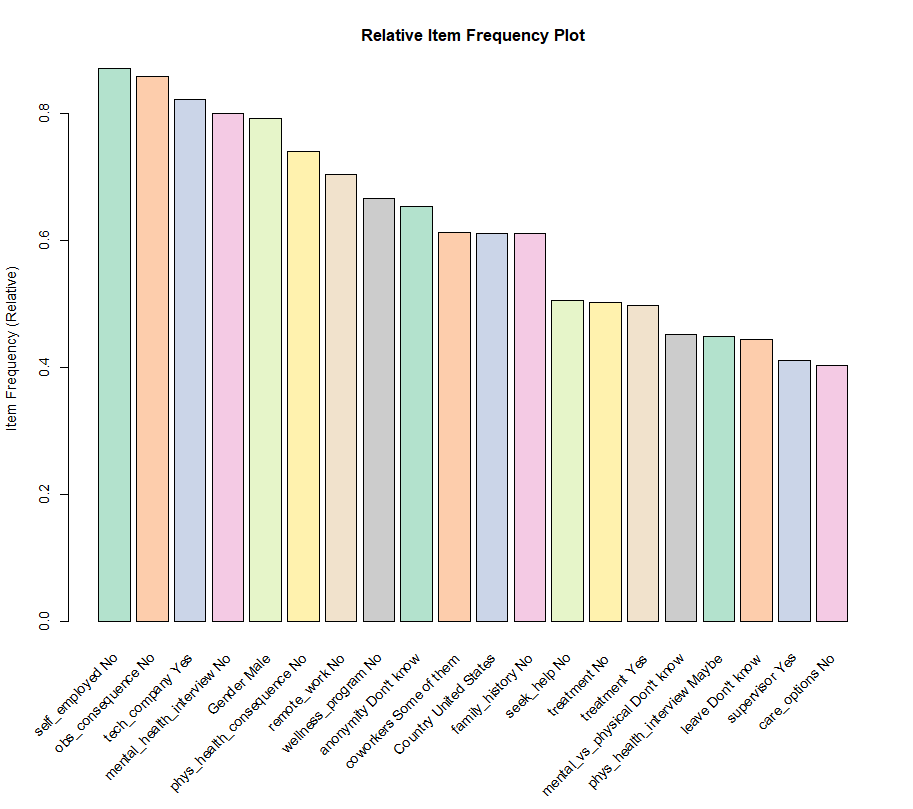

We can observe that the most frequent item is no self-employment, followed by no observed negative consequences for mental health issues. Due to the nature of this survey we find mostly tech companies in the itemset.

### What is the environment of people who sought treamment?

In [ ]:
# What is the environment of people who sought treamment?
rules.treatment<-apriori(data=trans1, parameter=list(supp=0.05, conf=0.08), appearance=list(default="lhs", rhs="treatment Yes"), control=list(verbose=F))
rules.treatment.byconf<-sort(rules.treatment, by="confidence", decreasing=TRUE)
plot(rules.treatment.byconf)

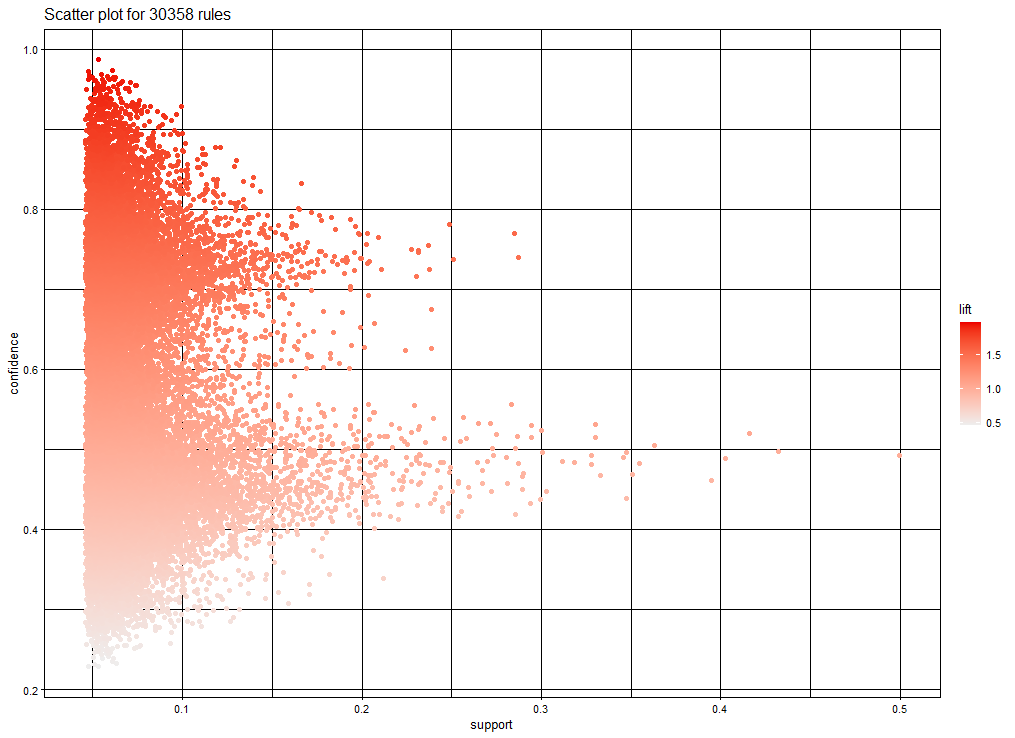

We can see that given our support level we can find a lot of good rules with high confidence. We are only interested in the one with the highest confidence.

In [ ]:
inspect(head(rules.treatment.byconf))

In [ ]:
# > # What is the environment of people who sought treamment?
# > rules.treatment<-apriori(data=trans1, parameter=list(supp=0.05, conf=0.08), appearance=list(default="lhs", rhs="treatment Yes"), control=list(verbose=F))
# > rules.treatment.byconf<-sort(rules.treatment, by="confidence", decreasing=TRUE)
# > inspect(head(rules.treatment.byconf))
#     lhs                              rhs                support confidence   coverage     lift count
# [1] {anonymity Yes,                                                                                 
#      care_options Yes,                                                                              
#      Country United States,                                                                         
#      work_interfere Sometimes}    => {treatment Yes} 0.05204778  0.9838710 0.05290102 1.977868    61
# [2] {care_options Yes,                                                                              
#      Country United States,                                                                         
#      phys_health_consequence No,                                                                    
#      remote_work No,                                                                                
#      work_interfere Sometimes}    => {treatment Yes} 0.05972696  0.9722222 0.06143345 1.954450    70
# [3] {care_options Yes,                                                                              
#      Country United States,                                                                         
#      phys_health_consequence No,                                                                    
#      remote_work No,                                                                                
#      self_employed No,                                                                              
#      work_interfere Sometimes}    => {treatment Yes} 0.05546075  0.9701493 0.05716724 1.950283    65
# [4] {care_options Yes,                                                                              
#      Country United States,                                                                         
#      mental_health_interview No,                                                                    
#      phys_health_consequence No,                                                                    
#      remote_work No,                                                                                
#      work_interfere Sometimes}    => {treatment Yes} 0.05375427  0.9692308 0.05546075 1.948436    63
# [5] {anonymity Yes,                                                                                 
#      care_options Yes,                                                                              
#      mental_health_interview No,                                                                    
#      remote_work No,                                                                                
#      work_interfere Sometimes}    => {treatment Yes} 0.05119454  0.9677419 0.05290102 1.945443    60
# [6] {anonymity Yes,                                                                                 
#      care_options Yes,                                                                              
#      remote_work No,                                                                                
#      self_employed No,                                                                              
#      work_interfere Sometimes}    => {treatment Yes} 0.05119454  0.9677419 0.05290102 1.945443    60

People who sought treatment for mental health issues often find workplaces where employers treat the issues anonymous. They find an environment which offers care options and where they do not fear negative consequences discussing about the issues.

In [ ]:
plot(rules.treatment.byconf, method= "graph")

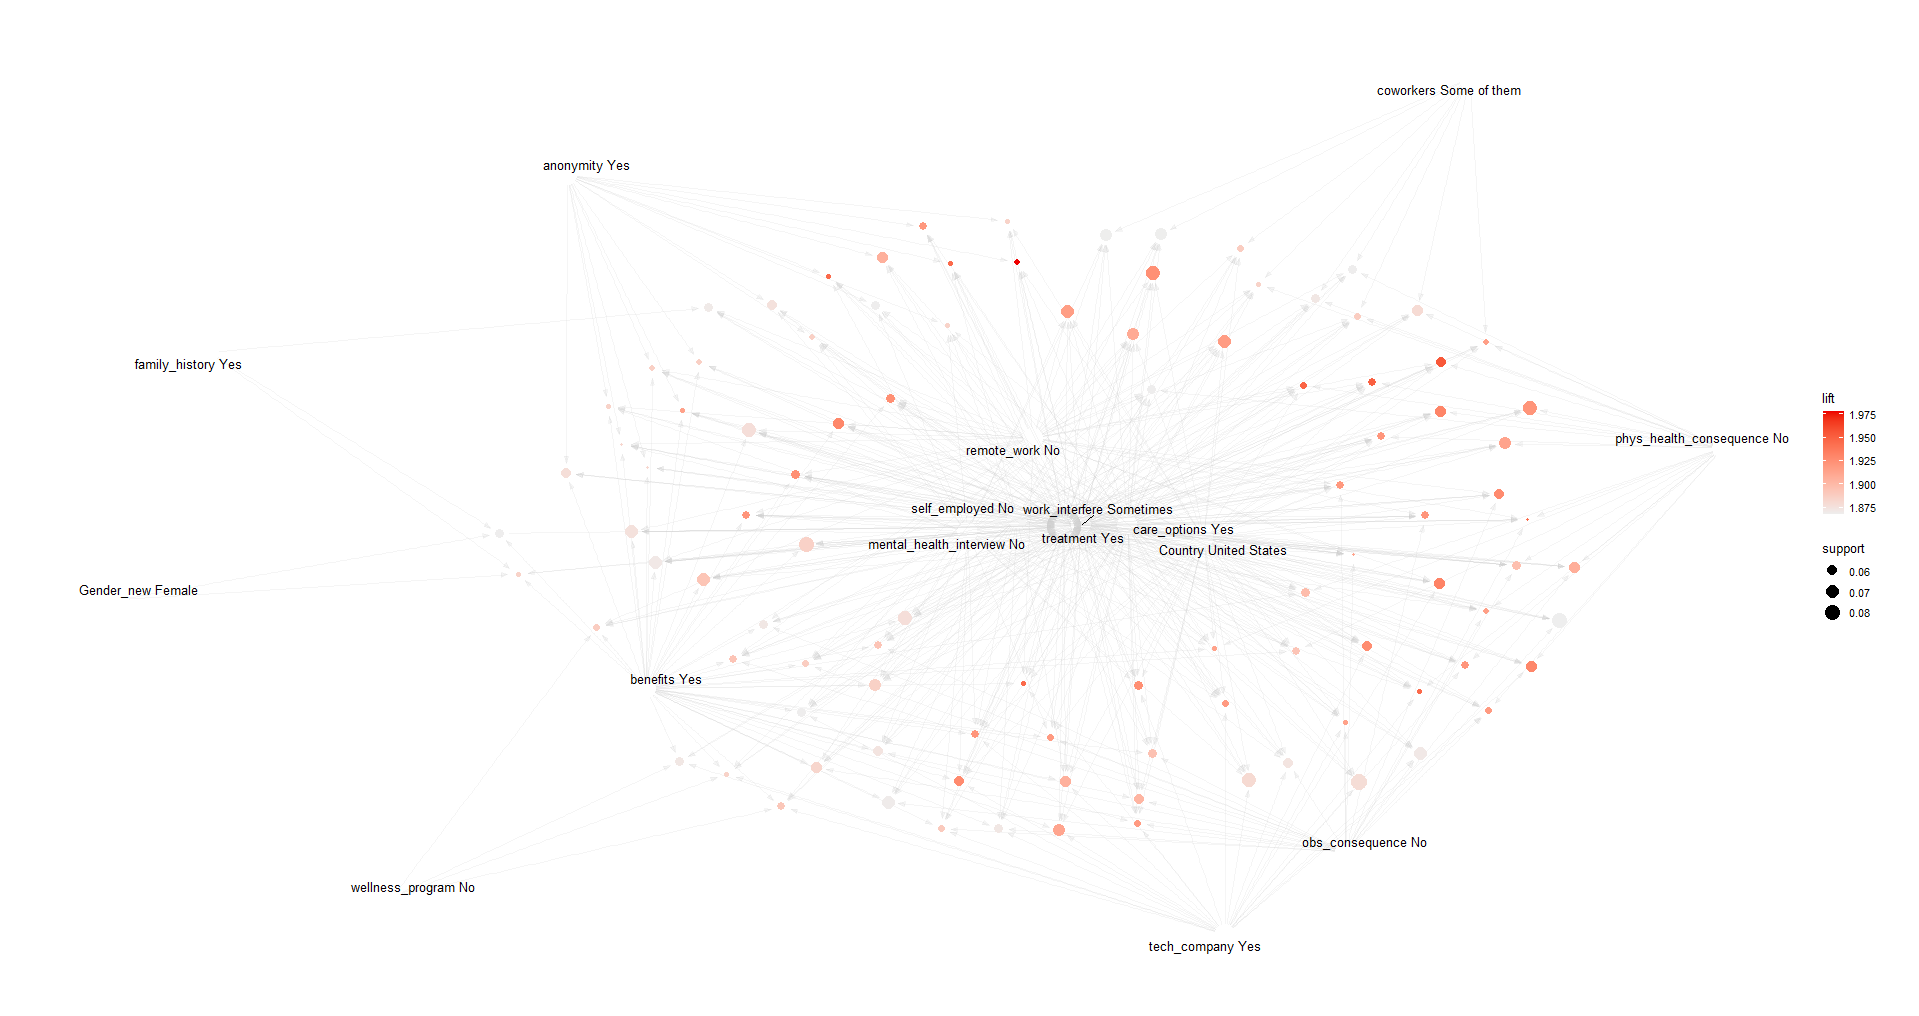

This association can also be seen in the graph above.

After having found out that the work environments facilitate the needs for those having sought treatment, we will further investigate the work places of the one having no treatment.

### What is associated with often having work interference because of mental health conditions?

In [ ]:
# What is associated with often having work interference because of mental health conditions??
rules.interference<-apriori(data=trans1, parameter=list(supp=0.05, conf=0.08), appearance=list(default="lhs", rhs="work_interfere Often"), control=list(verbose=F))
rules.interference.byconf<-sort(rules.interference, by="confidence", decreasing=TRUE)

In [ ]:
plot(rules.interference.byconf)

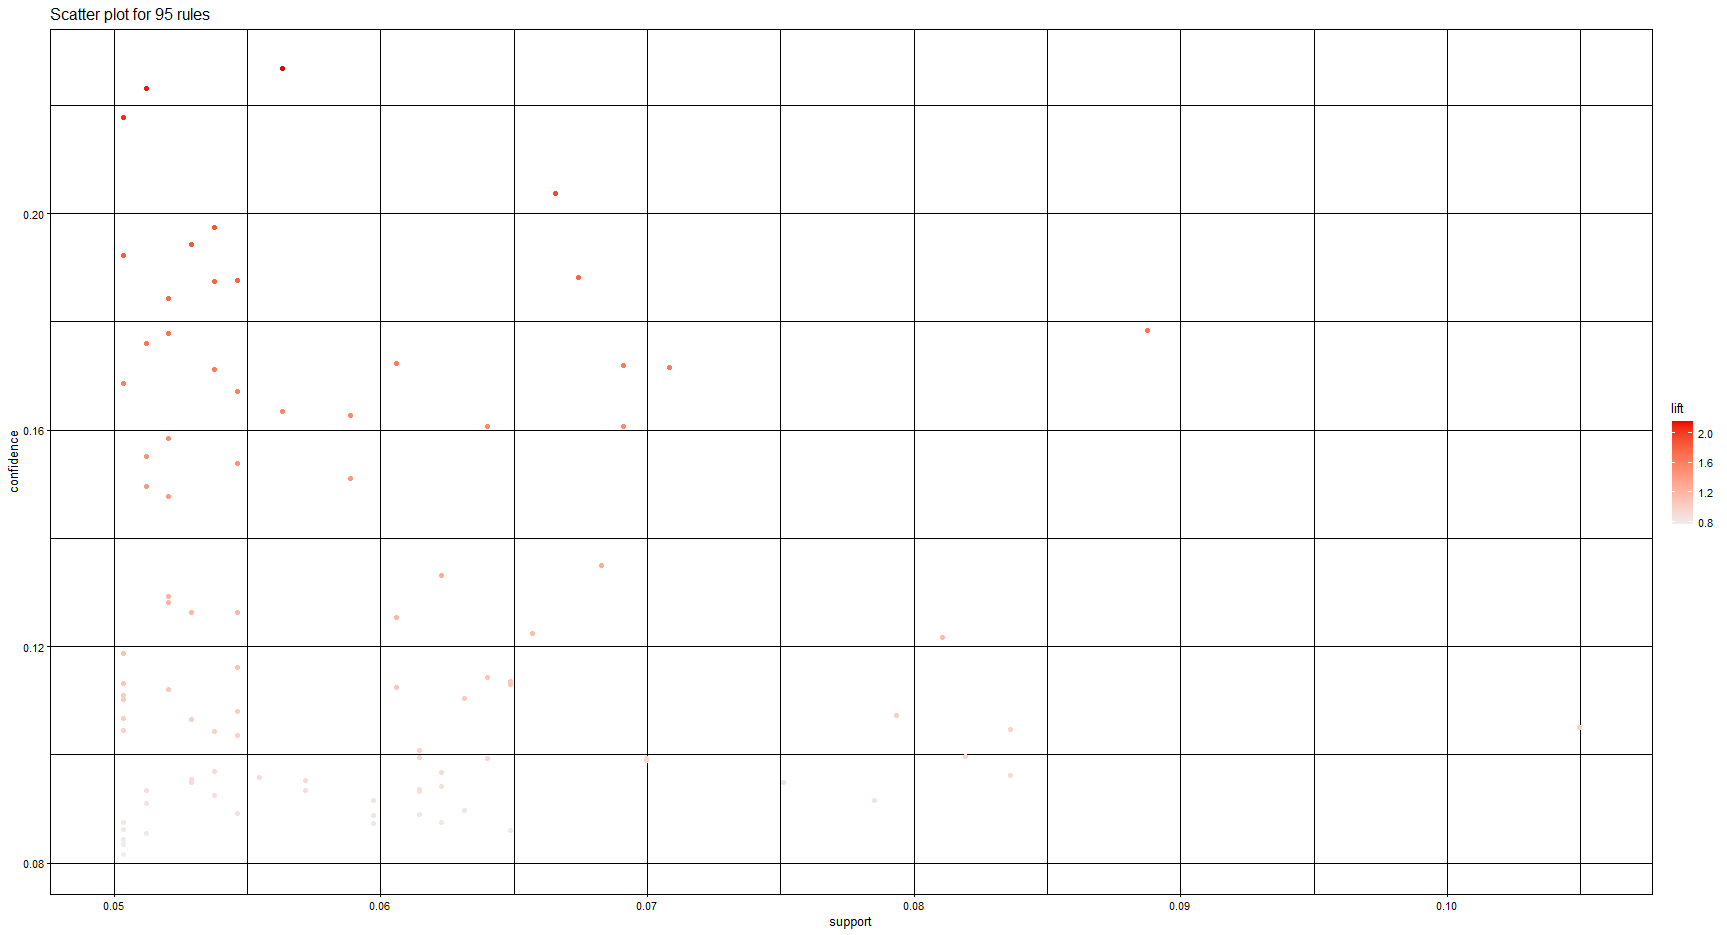

We can see that less associatens can be made but we still can see some meeting our defined criteria.

In [ ]:
inspect(head(rules.interference.byconf))

In [ ]:
# > rules.interference<-apriori(data=trans1, parameter=list(supp=0.05, conf=0.08), appearance=list(default="lhs", rhs="work_interfere Often"), control=list(verbose=F))
# > rules.interference.byconf<-sort(rules.interference, by="confidence", decreasing=TRUE)
# > inspect(head(rules.interference.byconf))
#     lhs                                                                 rhs                    support    confidence coverage  lift     count
# [1] {seek_help No, treatment Yes}                                    => {work_interfere Often} 0.05631399 0.2268041  0.2482935 2.161093 66   
# [2] {seek_help No, treatment Yes, wellness_program No}               => {work_interfere Often} 0.05119454 0.2230483  0.2295222 2.125306 60   
# [3] {phys_health_consequence No, treatment Yes, wellness_program No} => {work_interfere Often} 0.05034130 0.2177122  0.2312287 2.074461 59   
# [4] {treatment Yes, wellness_program No}                             => {work_interfere Often} 0.06655290 0.2036554  0.3267918 1.940521 78   
# [5] {mental_health_interview No, treatment Yes, wellness_program No} => {work_interfere Often} 0.05375427 0.1974922  0.2721843 1.881795 63   
# [6] {tech_company Yes, treatment Yes, wellness_program No}           => {work_interfere Often} 0.05290102 0.1943574  0.2721843 1.851925 62

People who often feel to have work interferences at work because of their mental health often find no help from their employers. Also we can see that missing wellness programs with mental health offers are also associated with those interferences.

In [ ]:
plot(rules.interference.byconf, method= "graph")

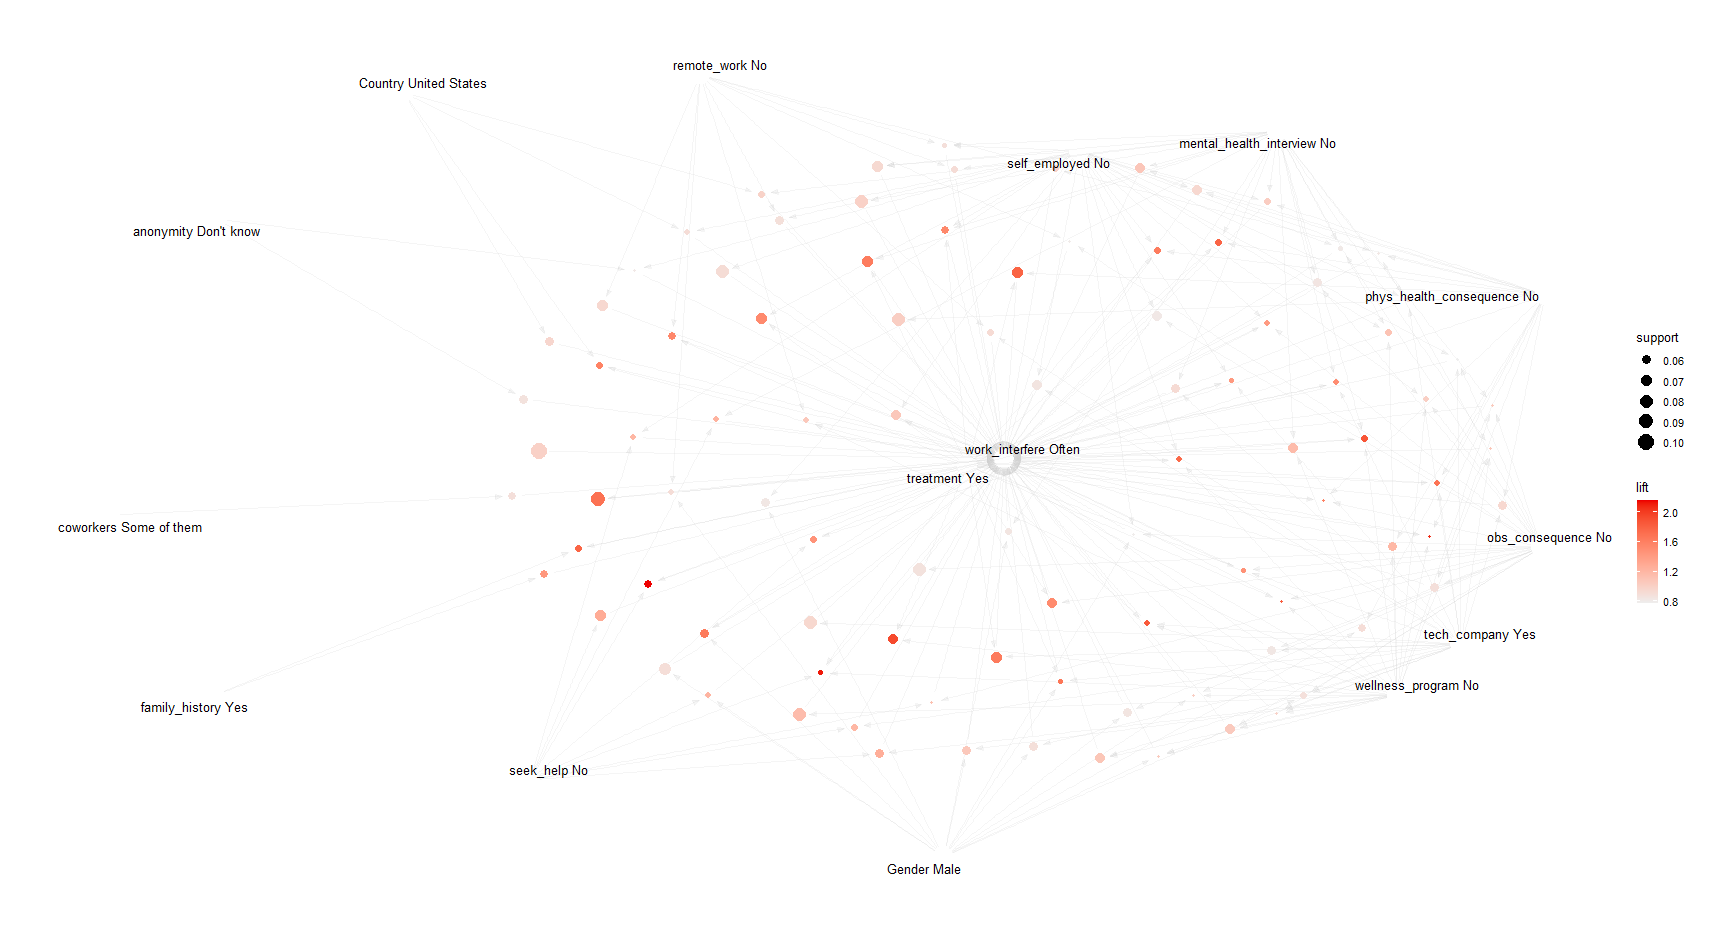

This obervations can be confirmed by the above graph.

### What is associated with never having work interference because of mental health conditions?

In [ ]:
# > # What is associated with never having work interference because of mental health conditions??
# > rules.interference<-apriori(data=trans1, parameter=list(supp=0.05, conf=0.08), appearance=list(default="lhs", rhs="work_interfere Never"), control=list(verbose=F))
# > rules.interference.byconf<-sort(rules.interference, by="confidence", decreasing=TRUE)
# > plot(rules.interference.byconf)

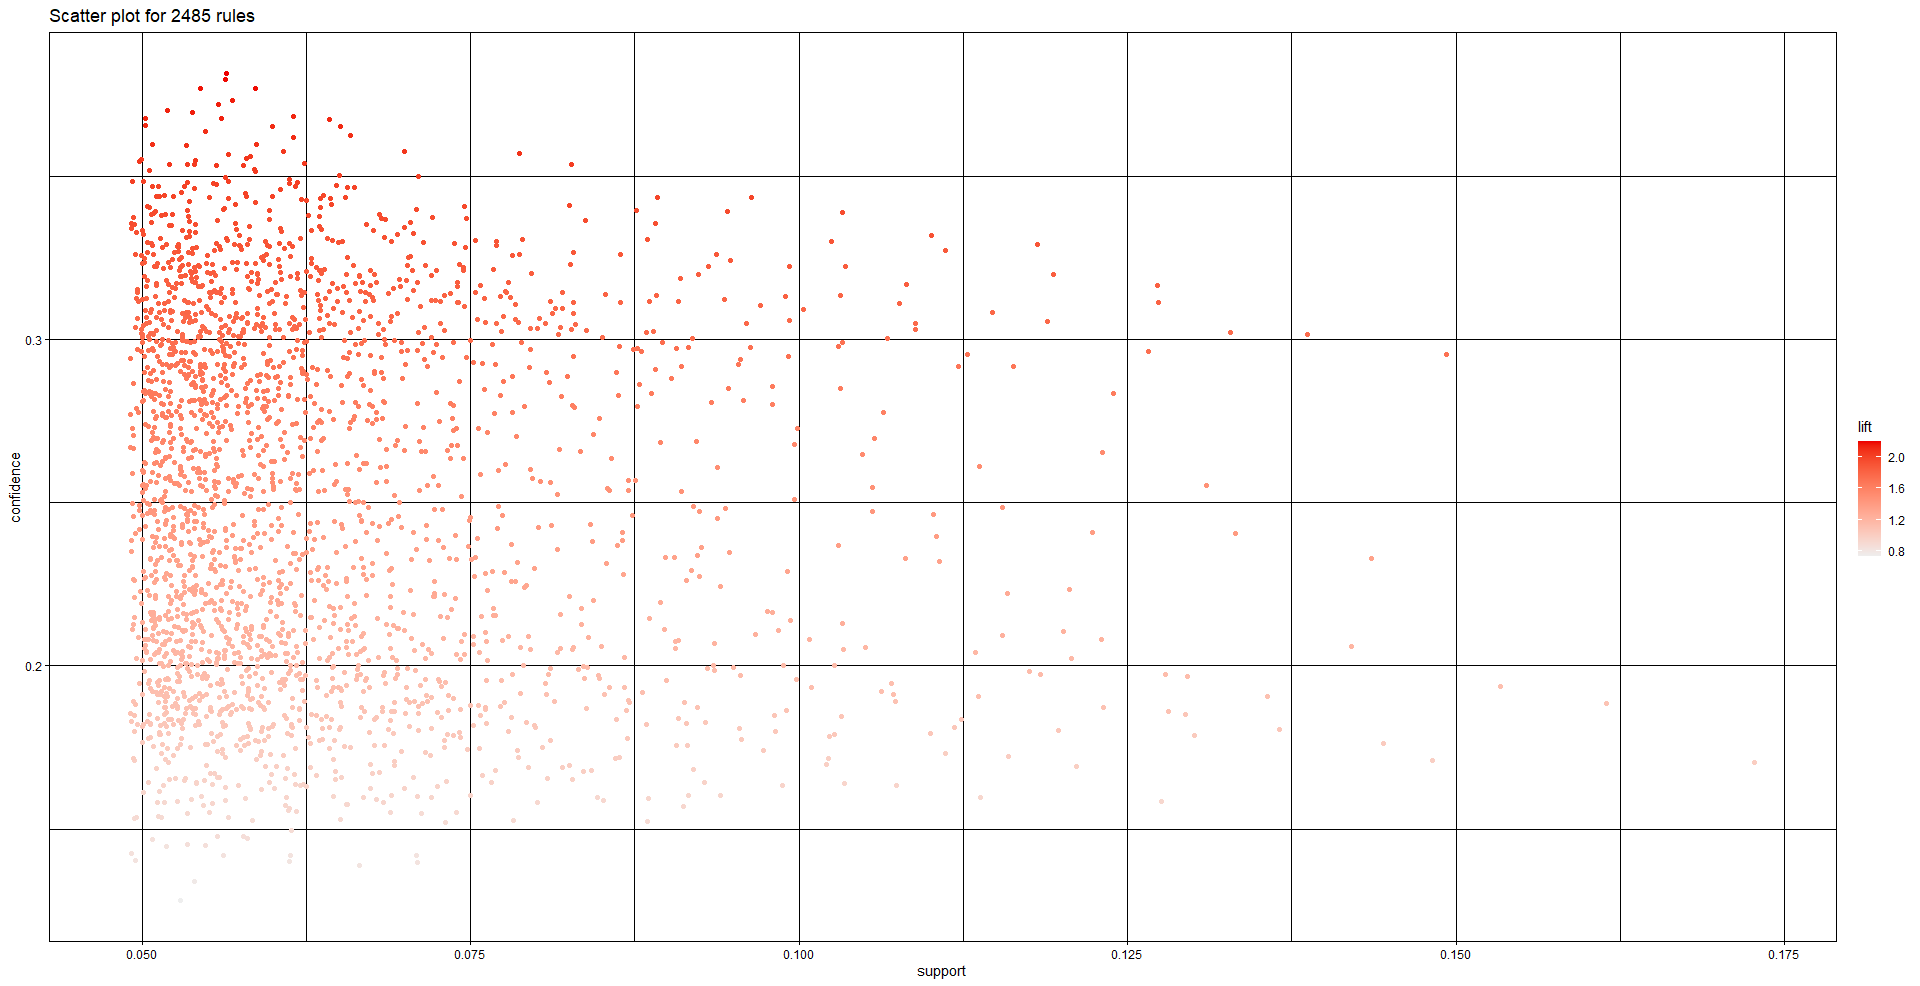

Here we once again see that many good associatens can be made. We are interesed in the one with the highest confidence.

In [1]:
# > inspect(head(rules.interference.byconf))
#     lhs                                rhs                       support confidence  coverage     lift count
# [1] {family_history No,                                                                                     
#      Gender Male,                                                                                           
#      mental_health_consequence No,                                                                          
#      obs_consequence No,                                                                                    
#      phys_health_consequence No,                                                                            
#      tech_company Yes,                                                                                      
#      treatment No}                  => {work_interfere Never} 0.05546075  0.3801170 0.1459044 2.205431    65
# [2] {family_history No,                                                                                     
#      Gender Male,                                                                                           
#      mental_health_consequence No,                                                                          
#      phys_health_consequence No,                                                                            
#      tech_company Yes,                                                                                      
#      treatment No}                  => {work_interfere Never} 0.05716724  0.3785311 0.1510239 2.196230    67
# [3] {family_history No,                                                                                     
#      Gender Male,                                                                                           
#      mental_health_consequence No,                                                                          
#      tech_company Yes,                                                                                      
#      treatment No}                  => {work_interfere Never} 0.05802048  0.3777778 0.1535836 2.191859    68
# [4] {family_history No,                                                                                     
#      Gender Male,                                                                                           
#      mental_health_consequence No,                                                                          
#      obs_consequence No,                                                                                    
#      tech_company Yes,                                                                                      
#      treatment No}                  => {work_interfere Never} 0.05546075  0.3757225 0.1476109 2.179935    65
# [5] {family_history No,                                                                                     
#      Gender Male,                                                                                           
#      phys_health_consequence No,                                                                            
#      supervisor Yes,                                                                                        
#      treatment No}                  => {work_interfere Never} 0.05546075  0.3714286 0.1493174 2.155021    65
# [6] {coworkers Some of them,                                                                                
#      family_history No,                                                                                     
#      Gender Male,                                                                                           
#      obs_consequence No,                                                                                    
#      phys_health_consequence No,                                                                            
#      tech_company Yes,                                                                                      
#      treatment No}                  => {work_interfere Never} 0.05290102  0.3712575 0.1424915 2.154029    62

Having never work interferences because of a consisting mental health condition is often associated with being a male with no family history of mental illnesses and having an "accepting" (no negative consequences, being able to talk to your supervisor, etc.) surrounding.

## Conclusion

In a world where mental health conditions are rated as the third biggest health challenge in times of Covid-19 and over 10% of the world population suffering from mental health conditions we could show that using association rule mining with Apriori leads to valuable insights into the mental health conditions at work places. 
Having a caring environment helps with mental health conditions. It is associated with less interferences at work. Furthermore, the opposite holds true for having often interferences. There we observed that this is often associated with no help offers from the employers. 
People who made the experience of already undergoing treatment are often in an work environment suited for their needs. It is associated with having care options and fearing no negative consequences. 
Therefore, an important key stone in tackeling this global health challenge is to form an accepting and supporting work environment. 

### Sources

[1] Ipsos. "Percentage of adults worldwide who stated select issues were the biggest health problems facing people in their country as of 2021." Chart. October 25, 2021. Statista. Accessed February 22, 2022. https://www.statista.com/statistics/917148/leading-health-problems-worldwide/</br>
[2] Saloni Dattani, Hannah Ritchie and Max Roser (2021) - "Mental Health". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/mental-health' [Online Resource]</br>
[3] Association Rule Learning. 2022. Wikipedia. Accessed February 22, 2022. https://en.wikipedia.org/w/index.php?title=Association_rule_learning&oldid=1069959346
